In [ ]:
import pandas as pd

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('amazon.csv', encoding='latin-1')


1. Display Top 5 Rows of The Dataset


In [ ]:
df.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01



2. Check Last 5 Rows

In [ ]:
df.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01



3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [ ]:
df.shape
print('Rows: ',df.shape[0])
print('Columns: ',df.shape[1])

Rows:  6454
Columns:  5



4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB



5. Check For Duplicate Data and Drop Them

In [ ]:
df.duplicated().any()

True

In [ ]:
df.shape

(6454, 5)

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(6422, 5)


6. Check Null Values In The Dataset

In [ ]:
df.isnull().sum()

,0
year,0
state,0
month,0
number,0
date,0


<Axes: >

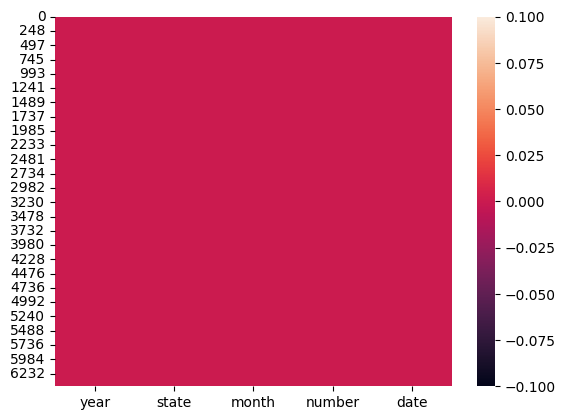

In [ ]:
sns.heatmap(df.isnull())


7. Get Overall Statistics About The Dataframe

In [ ]:
df.describe(include='all')

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,20
top,NaN,Rio,Agosto,NaN,2015-01-01
freq,NaN,697,540,NaN,324
mean,2007.490969,NaN,NaN,108.815178,NaN
std,5.731806,NaN,NaN,191.142482,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2003.000000,NaN,NaN,3.000000,NaN
50%,2007.000000,NaN,NaN,24.497000,NaN
75%,2012.000000,NaN,NaN,114.000000,NaN



8. Rename Month Names To English

In [ ]:
df.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [ ]:
df['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [ ]:
df['eng_month']=df['month'].map({'Janeiro':'Janaury',
                                 'Fevereiro':'Feburary',
                                 'Março':'March',
                                 'Abril':'April',
                                 'Maio':'March',
                                 'Junho':'June',
                                 'Julho':'July',
                                 'Agosto':'August',
                                 'Setembro':'September',
                                 'Outubro':'October',
                                 'Novembro':'November',
                                 'Dezembro':'December'})

In [ ]:
df.head(3)

,year,state,month,number,date,eng_month
0,1998,Acre,Janeiro,0.0,1998-01-01,Janaury
1,1999,Acre,Janeiro,0.0,1999-01-01,Janaury
2,2000,Acre,Janeiro,0.0,2000-01-01,Janaury



9. Total Number of Fires Registered

In [ ]:
print('Total Number of Fires Registered: ',df.shape[0])

Total Number of Fires Registered:  6422



10. In Which Month Maximum Number of Forest Fires Were Reported?

In [ ]:
df1=df.groupby('eng_month')['number'].sum().reset_index()
df1

,eng_month,number
0,April,28184.770
1,August,88050.435
2,December,57535.480
3,Feburary,30839.050
4,Janaury,47681.844
5,July,92319.113
6,June,55997.675
7,March,65434.768
8,November,85508.054
9,October,88681.579


<Axes: xlabel='number', ylabel='eng_month'>

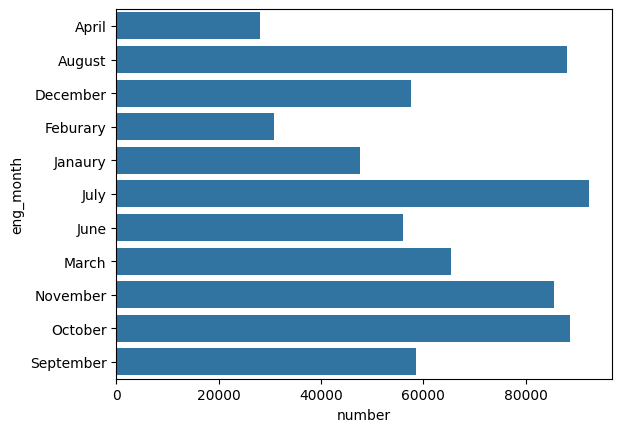

In [ ]:
sns.barplot(x='number',y='eng_month',data=df1)


11. In Which Year Maximum Number of Forest Fires Was Reported?

In [ ]:
df2=df.groupby('year')['number'].sum().reset_index()
df2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '1998'),
  Text(1, 0, '1999'),
  Text(2, 0, '2000'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012'),
  Text(15, 0, '2013'),
  Text(16, 0, '2014'),
  Text(17, 0, '2015'),
  Text(18, 0, '2016'),
  Text(19, 0, '2017')])

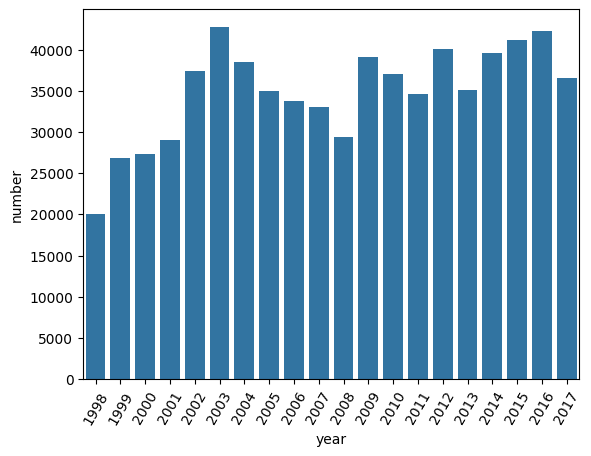

In [ ]:
sns.barplot(x='year', y= 'number', data=df2)
plt.xticks(rotation=60)


12. In Which State Maximum Number of Forest Fires Was Reported?

In [ ]:
df3=df.groupby('state')['number'].sum().reset_index()
df3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


<Axes: xlabel='number', ylabel='state'>

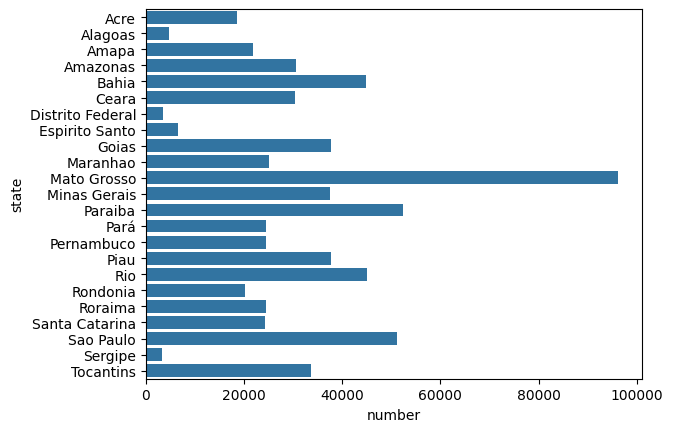

In [ ]:
sns.barplot(x='number',y='state',data=df3)


13. Find Total Number of Fires Were Reported In Amazonas

In [ ]:
df[df['state']=='Amazonas']['number'].sum()

30650.129


14. Display Number of Fires Were Reported In Amazonas (Year-Wise)

In [ ]:
df4=df[df['state']=='Amazonas']

In [ ]:
df5=df4.groupby('year')['number'].sum().reset_index()

<Axes: xlabel='year', ylabel='number'>

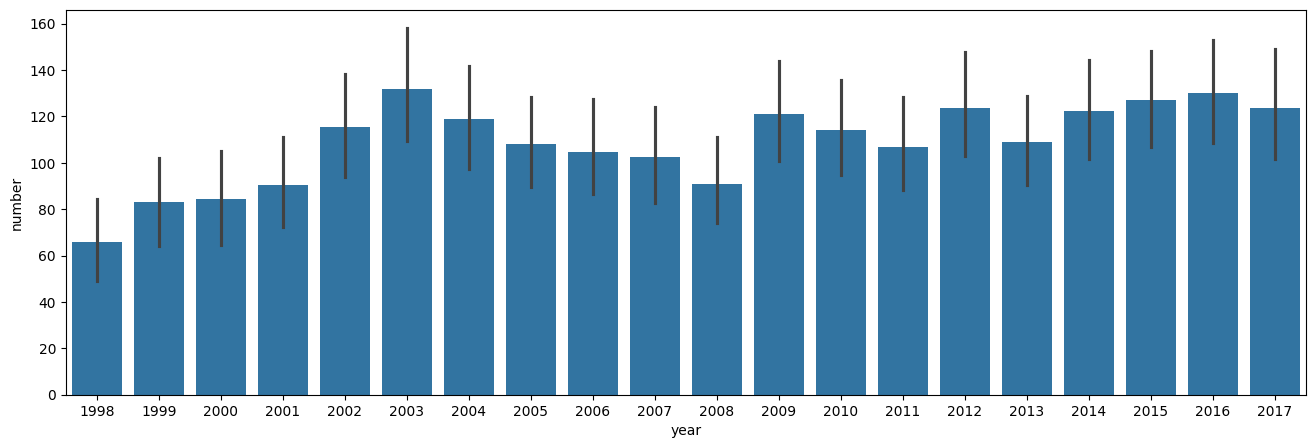

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x='year',y='number',data=df)



15. Display Number of Fires Were Reported In Amazonas (Day-Wise)

In [ ]:
df6=df[df['state']=='Amazonas']


16. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’

In [ ]:
df7=df[df['year']== 2015]

<ipython-input-137-91e4015ed2bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['date'] = pd.to_datetime(df7['date'])
<ipython-input-137-91e4015ed2bf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['number'] = pd.to_numeric(df7['number'], errors='coerce')


Total number of fires reported in 2015: 41208.292


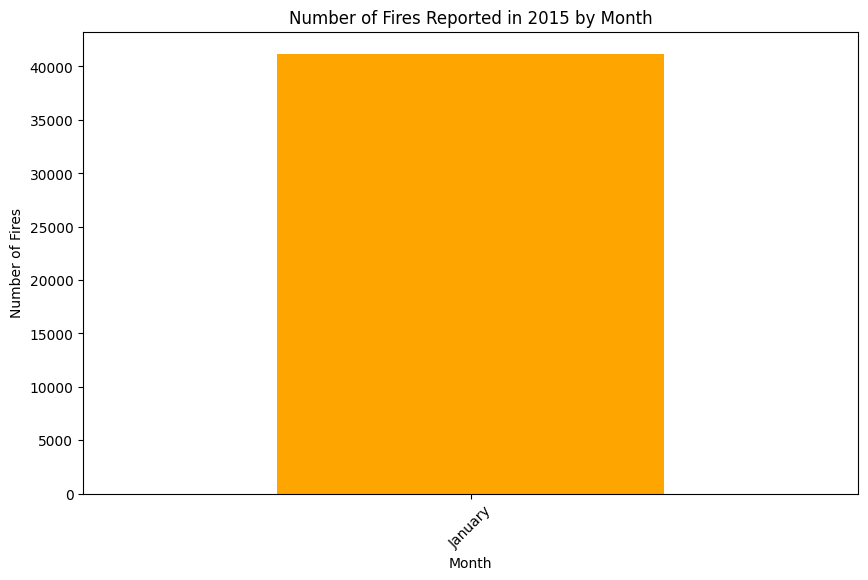

In [ ]:

# 1. Convert 'date' column to datetime
df7['date'] = pd.to_datetime(df7['date'])

# 2. Ensure 'number_of_fires' is numeric
df7['number'] = pd.to_numeric(df7['number'], errors='coerce')

# 3. Filter the DataFrame for the year 2015
df7_2015 = df7[df7['date'].dt.year == 2015]

# 4. Group by month and sum the number of fires
fires_by_month = df7_2015.groupby(df7_2015['date'].dt.month)['number'].sum()

# 5. Rename the index to month names
fires_by_month.index = [calendar.month_name[month] for month in fires_by_month.index]

# 6. Total number of fires in 2015
total_fires_2015 = fires_by_month.sum()
print(f"Total number of fires reported in 2015: {total_fires_2015}")

# 7. Plot the data
fires_by_month.plot(kind='bar', color='orange', figsize=(10, 6))

# Add labels and title
plt.title('Number of Fires Reported in 2015 by Month')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.xticks(rotation=45)  # Rotate month labels for better readability

# Show the plot
plt.show()


17. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)


18.  To Find The State Names Where Fires Were Reported In 'dec' Month